In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from collections import Counter

import string

from nltk.corpus import stopwords

import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns



In [49]:
df = pd.read_csv("../input/cnn-articles-after-basic-cleaning/CNN_Articels_clean_2/CNN_Articels_clean.csv")
pd.set_option('display.max_columns', None)
proc_df = df.copy()
proc_df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            37949 non-null  int64 
 1   Author           37949 non-null  object
 2   Date published   37949 non-null  object
 3   Category         37949 non-null  object
 4   Section          37949 non-null  object
 5   Url              37949 non-null  object
 6   Headline         37949 non-null  object
 7   Description      37949 non-null  object
 8   Keywords         37949 non-null  object
 9   Second headline  37949 non-null  object
 10  Article text     37940 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.2+ MB


In [51]:
Counter( proc_df['Category'])

Counter({'news': 18077,
         'business': 854,
         'health': 557,
         'entertainment': 413,
         'sport': 15542,
         'politics': 2461,
         'travel': 39,
         'vr': 5,
         'style': 1})

In [52]:
proc_df = proc_df[proc_df["Category"].str.contains("news|sport|politics") == True]
proc_df.reset_index(drop=True, inplace=True)
proc_df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,64,"Ben Morse, CNN",2022-03-21 09:05:42,sport,sport,https://www.cnn.com/2022/03/21/sport/cleveland...,Cleveland Browns defend Deshaun Watson signing...,The Cleveland Browns have defended their signi...,"sport, Cleveland Browns defend Deshaun Watson ...",Cleveland Browns defend Deshaun Watson signing...,(CNN)The Cleveland Browns have defended their...
4,65,"Ben Church, CNN",2022-03-20 18:02:52,sport,motorsport,https://www.cnn.com/2022/03/20/motorsport/bahr...,Bahrain Grand Prix: Ferrari dominates as Charl...,Charles Leclerc won the Bahrain Grand Prix on ...,"motorsport, Bahrain Grand Prix: Ferrari domina...",Bahrain Grand Prix: Ferrari dominates as Charl...,(CNN)Charles Leclerc won the Bahrain Grand Pr...


In [53]:
proc_df['head_desc_head'] = (proc_df["Headline"] + ' ' + proc_df["Description"] + ' ' + proc_df["Second headline"]).str.lower()
proc_df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,head_desc_head
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...","there's a shortage of truckers, but tusimple t..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,bioservo's robotic 'ironhand' could protect fa...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",this swarm of robots gets smarter the more it ...
3,64,"Ben Morse, CNN",2022-03-21 09:05:42,sport,sport,https://www.cnn.com/2022/03/21/sport/cleveland...,Cleveland Browns defend Deshaun Watson signing...,The Cleveland Browns have defended their signi...,"sport, Cleveland Browns defend Deshaun Watson ...",Cleveland Browns defend Deshaun Watson signing...,(CNN)The Cleveland Browns have defended their...,cleveland browns defend deshaun watson signing...
4,65,"Ben Church, CNN",2022-03-20 18:02:52,sport,motorsport,https://www.cnn.com/2022/03/20/motorsport/bahr...,Bahrain Grand Prix: Ferrari dominates as Charl...,Charles Leclerc won the Bahrain Grand Prix on ...,"motorsport, Bahrain Grand Prix: Ferrari domina...",Bahrain Grand Prix: Ferrari dominates as Charl...,(CNN)Charles Leclerc won the Bahrain Grand Pr...,bahrain grand prix: ferrari dominates as charl...


In [54]:
proc_df['head_desc_head'][5]

'greg norman: lucrative saudi-backed golf league is \'new opportunity\' for players, says ceo - cnn the new lucrative saudi arabia-backed golf league is a "new opportunity" for players and the sport, according to its chairman greg norman.  lucrative saudi-backed golf league is \'new opportunity\' for players, says ceo greg norman'

In [55]:
proc_df['head_desc_head'] = proc_df['head_desc_head'].str.replace('https*\S+', '')
proc_df['head_desc_head'] = proc_df['head_desc_head'].str.replace('[^A-Za-z]', ' ')
proc_df['head_desc_head'] = proc_df['head_desc_head'].str.replace('\s{2,}', ' ')

stop_words = stopwords.words("english")
stop_words.append('u')
proc_df['head_desc_head'] = proc_df['head_desc_head'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
proc_df['head_desc_head'][5]

'greg norman lucrative saudi backed golf league new opportunity players says ceo cnn new lucrative saudi arabia backed golf league new opportunity players sport according chairman greg norman lucrative saudi backed golf league new opportunity players says ceo greg norman'

In [57]:
category_textes = {}

for category in ['news', 'sport', 'politics']:
    category_textes[category] = ' '.join(proc_df['head_desc_head'][proc_df['Category'] == category])


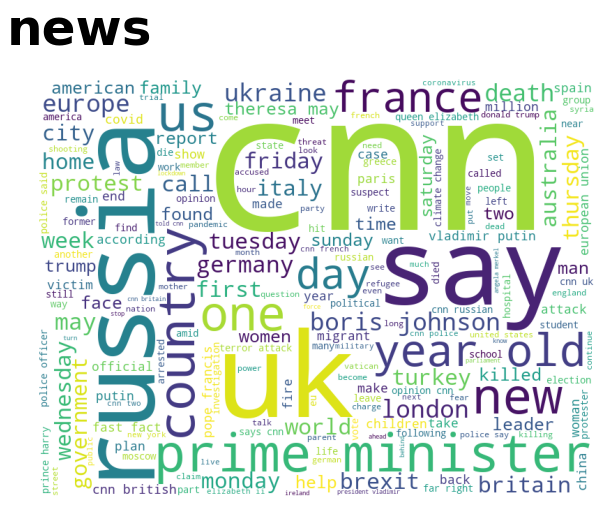

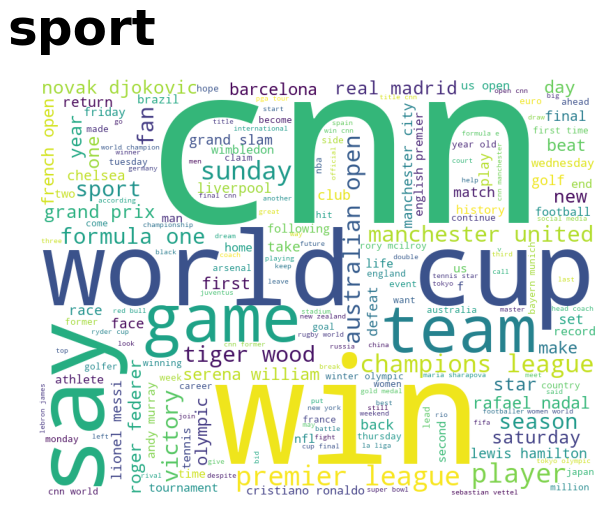

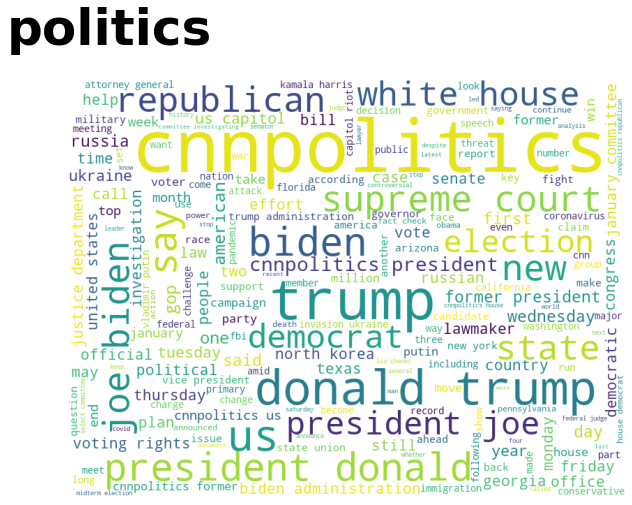

In [58]:
for category in ['news', 'sport', 'politics']:    
    wordcloud = WordCloud(width=800, height=600, background_color="white").generate(category_textes[category])
    plt.figure(figsize = (10, 10))
    plt.text(60, -50, category, fontsize=50, ha='center', weight='bold')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(proc_df['head_desc_head'], proc_df['Category'], test_size=0.05)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34276,) (1804,) (34276,) (1804,)


In [60]:
count_vectorizer = CountVectorizer()
X_train_transformed_count_vectorizer = count_vectorizer.fit_transform(X_train)
X_test_transformed_count_vectorizer = count_vectorizer.transform(X_test)

In [61]:
tfidf_vectorizer = TfidfVectorizer()

X_train_transformed_tfidf_vectorizer = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed_tfidf_vectorizer =  tfidf_vectorizer.transform(X_test)

In [62]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_transformed_count_vectorizer, y_train)
y_pred_count_Multinomial = model.predict(X_test_transformed_count_vectorizer)

In [63]:
print(classification_report(y_test, y_pred_count_Multinomial))

              precision    recall  f1-score   support

        news       0.96      0.92      0.94       911
    politics       0.73      0.92      0.81       116
       sport       0.96      0.97      0.96       777

    accuracy                           0.94      1804
   macro avg       0.88      0.94      0.91      1804
weighted avg       0.95      0.94      0.94      1804



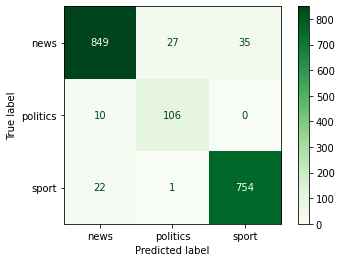

In [85]:
ConfusionMatrixDisplay.from_estimator(model, X_test_transformed_count_vectorizer, y_test,
                      cmap=plt.cm.Greens, values_format = '.5g')
plt.show()

In [65]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_transformed_tfidf_vectorizer, y_train)
y_pred_tfidf_Multinomial = model.predict(X_test_transformed_tfidf_vectorizer)

In [66]:
print(classification_report(y_test, y_pred_tfidf_Multinomial))

              precision    recall  f1-score   support

        news       0.93      0.95      0.94       911
    politics       0.86      0.68      0.76       116
       sport       0.96      0.96      0.96       777

    accuracy                           0.94      1804
   macro avg       0.92      0.87      0.89      1804
weighted avg       0.94      0.94      0.94      1804



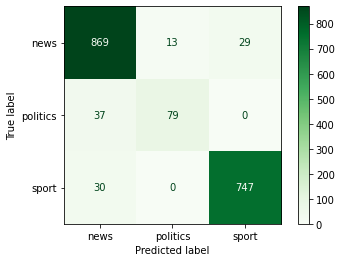

In [86]:
ConfusionMatrixDisplay.from_estimator(model, X_test_transformed_tfidf_vectorizer, y_test,
                      cmap=plt.cm.Greens, values_format = '.5g')
plt.show()

In [94]:
model = RandomForestClassifier()
model.fit(X_train_transformed_count_vectorizer, y_train)
y_pred_count_RandomForest = model.predict(X_test_transformed_count_vectorizer)

In [95]:
print(classification_report(y_test, y_pred_count_RandomForest))

              precision    recall  f1-score   support

        news       0.95      0.96      0.96       911
    politics       1.00      1.00      1.00       116
       sport       0.96      0.94      0.95       777

    accuracy                           0.96      1804
   macro avg       0.97      0.97      0.97      1804
weighted avg       0.96      0.96      0.96      1804



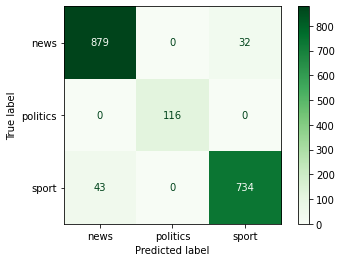

In [96]:
ConfusionMatrixDisplay.from_estimator(model, X_test_transformed_count_vectorizer, y_test,
                      cmap=plt.cm.Greens, values_format = '.5g')
plt.show()

In [97]:
model = RandomForestClassifier()
model.fit(X_train_transformed_tfidf_vectorizer, y_train)
y_pred_tfidf_RandomForest = model.predict(X_test_transformed_tfidf_vectorizer)

In [98]:
print(classification_report(y_test, y_pred_tfidf_RandomForest))

              precision    recall  f1-score   support

        news       0.96      0.96      0.96       911
    politics       1.00      0.99      1.00       116
       sport       0.95      0.95      0.95       777

    accuracy                           0.96      1804
   macro avg       0.97      0.97      0.97      1804
weighted avg       0.96      0.96      0.96      1804



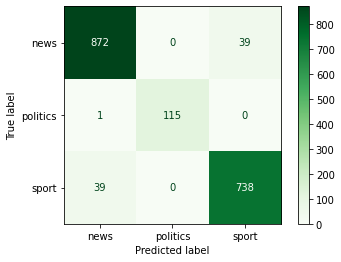

In [99]:
ConfusionMatrixDisplay.from_estimator(model, X_test_transformed_tfidf_vectorizer, y_test,
                      cmap=plt.cm.Greens, values_format = '.5g')
plt.show()
